#  STORAGE CAPACITY OPTIMIZATION :
This Module is an example of storage capacity optimisation.

This example describes a simple microgrid with :
- A load profile known in advance 
- An adjustable production unit, with a maximum power limit
- A storage system with power in charge and power in discharge 

# Objective :

The objective consists in minimizing the storage capacity while meeting the load during the whole time horizon.
![title](images/schema_stockage.png)

# Operating steps : 

1. Creates an empty model
2. Creates the load or the load profile is already known
3. Creates the production unit - The production profile is unknown
4. Creates the storage
5. Objective: Minimize the storage capacity
6. Creates the energy node
7. Connect all units on the same energy node
8. Add node to the model
9. Optimisation process

In [1]:
#import sys
#sys.path.append('D:\dev\Omegalpes')

In [2]:
import pulp
from StudyCase2 import storage, print_results_storage

## Input parameters :

- The load profile has to be define by  values for each hours of the day. There is no incoherent value as long as you make them relative to each others
- The maximum power has to be define in kWh
- The maximum charging and discharging power have to be set in kW

In [3]:
# Load dynamic profile - one value per hour during a day
LOAD_PROFILE = [4, 5, 6, 2, 3, 4, 7, 8, 13, 24, 18, 16, 17, 12, 20, 15, 17, 21, 25, 23, 18, 16, 13, 4]

In [4]:
# Maximal power that can be delivered by the production unit
PRODUCTION_P_MAX = 15

In [5]:
# Storage maximal charging and discharging powers
(STORAGE_PC_MAX, STORAGE_PD_MAX) = 20, 20

In [6]:
 # Run main
storage(load_profile=LOAD_PROFILE, production_pmax=PRODUCTION_P_MAX,
         storage_pcharge_max=STORAGE_PC_MAX,
         storage_pdischarge_max=STORAGE_PD_MAX)

You are studying the period from 2018-01-01 00:00:00 to 2018-01-01 23:00:00
Creating the load.
Creating the production.
Creating the storage.
Creating the energy_node.

--- Adding all variables to the model ---
Adding variable : load_p
Adding variable : load_e_tot
Adding variable : load_u
Adding variable : production_p
Adding variable : production_e_tot
Adding variable : production_u
Adding variable : storage_p
Adding variable : storage_e_tot
Adding variable : storage_u
Adding variable : storage_capacity
Adding variable : storage_e
Adding variable : storage_pc
Adding variable : storage_pd
Adding variable : storage_uc

--- Adding all objectives to the model ---
Adding objective : storage_min_capacity

--- Adding all constraints to the model ---
Adding constraint : energy_node_power_balance , exp = -load_p[t]+production_p[t]-storage_p[t] == 0 for t in time.I
Adding constraint : load_on_off_max , exp = load_p[t] <= load_u[t] * 100000.0 for t in time.I
Adding constraint : load_on_off_min ,


 - - - - - OPTIMISATION RESULTS - - - - - 
The optimal storage capacity is 47.0 kWh

Preparing to plot the energetic flows through the node energy_node.
	Add power from load.
	Add power from production.
	Add power from storage.


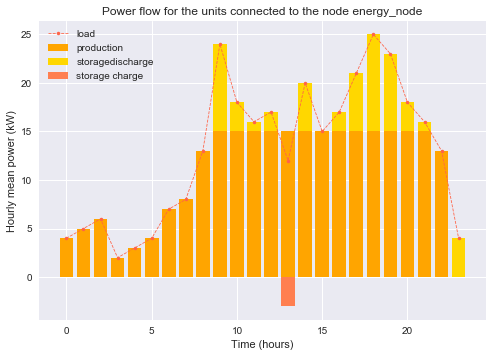

In [9]:
print_results_storage()